In [5]:
import pandas as pd

# Load the dataset
file_path = (r"C:\Users\abiod\Desktop\GIS file\Crime_Incidents_in_2024.csv")
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,400040.6100,129046.4721,18060158,2024/07/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,400 - 599 BLOCK OF CHESAPEAKE STREET SE,400040.610046,129046.472149,...,009802 2,9802.0,Precinct 125,38.829204,-76.999532,NaN,2018/04/15 16:07:00+00,2018/04/15 17:34:56+00,688672882,NaN
1,397833.8700,138551.8900,23101994,2024/02/07 18:11:44+00,DAY,OTHERS,THEFT F/AUTO,900 - 999 BLOCK OF WESTMINSTER STREET NW,397833.870000,138551.890000,...,004402 2,4402.0,Precinct 137,38.914830,-77.024977,NaN,2023/06/25 07:34:00+00,2023/06/25 08:09:00+00,688697908,NaN
2,397576.9900,143086.8500,20160181,2024/05/22 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,5401 - 5499 BLOCK OF GEORGIA AVENUE NW,397576.990000,143086.850000,...,002101 5,2101.0,Precinct 56,38.955682,-77.027955,NaN,2020/11/09 02:03:53+00,2020/11/09 02:20:49+00,688947135,NaN
3,399337.0100,138221.0900,21151970,2024/06/20 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,2 - 99 BLOCK OF QUINCY PLACE NE,399337.010000,138221.090000,...,008701 1,8701.0,Precinct 75,38.911853,-77.007644,NaN,2021/10/19 01:53:00+00,2021/10/19 07:56:00+00,688957976,NaN
4,400891.3397,131932.5347,22065374,2024/05/22 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,2400 - 2699 BLOCK OF POMEROY ROAD SE,400891.339743,131932.534680,...,007406 2,7406.0,Precinct 118,38.855203,-76.989731,NaN,2022/05/10 13:30:00+00,2022/05/10 14:15:00+00,688963056,NaN


In [6]:
import geopandas as gpd
from shapely.geometry import Point

# Convert REPORT_DAT to datetime
df["REPORT_DAT"] = pd.to_datetime(df["REPORT_DAT"], errors="coerce")

# Drop rows with missing coordinates
df_clean = df.dropna(subset=["LATITUDE", "LONGITUDE"])

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(df_clean["LONGITUDE"], df_clean["LATITUDE"])]
gdf = gpd.GeoDataFrame(df_clean, geometry=geometry, crs="EPSG:4326")

# Display summary
gdf.head()


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID,geometry
0,400040.6100,129046.4721,18060158,2024-07-30 04:00:00+00:00,MIDNIGHT,GUN,HOMICIDE,400 - 599 BLOCK OF CHESAPEAKE STREET SE,400040.610046,129046.472149,...,9802.0,Precinct 125,38.829204,-76.999532,NaN,2018/04/15 16:07:00+00,2018/04/15 17:34:56+00,688672882,NaN,POINT (-76.99953 38.8292)
1,397833.8700,138551.8900,23101994,2024-02-07 18:11:44+00:00,DAY,OTHERS,THEFT F/AUTO,900 - 999 BLOCK OF WESTMINSTER STREET NW,397833.870000,138551.890000,...,4402.0,Precinct 137,38.914830,-77.024977,NaN,2023/06/25 07:34:00+00,2023/06/25 08:09:00+00,688697908,NaN,POINT (-77.02498 38.91483)
2,397576.9900,143086.8500,20160181,2024-05-22 04:00:00+00:00,MIDNIGHT,GUN,HOMICIDE,5401 - 5499 BLOCK OF GEORGIA AVENUE NW,397576.990000,143086.850000,...,2101.0,Precinct 56,38.955682,-77.027955,NaN,2020/11/09 02:03:53+00,2020/11/09 02:20:49+00,688947135,NaN,POINT (-77.02795 38.95568)
3,399337.0100,138221.0900,21151970,2024-06-20 04:00:00+00:00,MIDNIGHT,GUN,HOMICIDE,2 - 99 BLOCK OF QUINCY PLACE NE,399337.010000,138221.090000,...,8701.0,Precinct 75,38.911853,-77.007644,NaN,2021/10/19 01:53:00+00,2021/10/19 07:56:00+00,688957976,NaN,POINT (-77.00764 38.91185)
4,400891.3397,131932.5347,22065374,2024-05-22 04:00:00+00:00,MIDNIGHT,GUN,HOMICIDE,2400 - 2699 BLOCK OF POMEROY ROAD SE,400891.339743,131932.534680,...,7406.0,Precinct 118,38.855203,-76.989731,NaN,2022/05/10 13:30:00+00,2022/05/10 14:15:00+00,688963056,NaN,POINT (-76.98973 38.8552)


In [7]:
import numpy as np
from scipy.spatial import cKDTree
from scipy.stats import zscore

# Create spatial grid (convert coordinates to NumPy array)
coords = np.array(list(zip(gdf["LONGITUDE"], gdf["LATITUDE"])))

# Compute nearest neighbors using KDTree
tree = cKDTree(coords)
distances, _ = tree.query(coords, k=10)  # k=10 nearest neighbors

# Compute Z-scores (standardized distance measure)
gdf["HOTSPOT_SCORE"] = zscore(np.mean(distances, axis=1))

# Label hotspots (higher positive Z-scores indicate clustering of high values)
gdf["HOTSPOT_LABEL"] = np.where(gdf["HOTSPOT_SCORE"] > 1.96, "Hotspot",
                                np.where(gdf["HOTSPOT_SCORE"] < -1.96, "Coldspot", "Neutral"))

# Show results
gdf[["LATITUDE", "LONGITUDE", "HOTSPOT_SCORE", "HOTSPOT_LABEL"]].head()


,LATITUDE,LONGITUDE,HOTSPOT_SCORE,HOTSPOT_LABEL
0,38.829204,-76.999532,0.366950,Neutral
1,38.914830,-77.024977,-0.126471,Neutral
2,38.955682,-77.027955,-0.063103,Neutral
3,38.911853,-77.007644,0.027545,Neutral
4,38.855203,-76.989731,-0.723030,Neutral


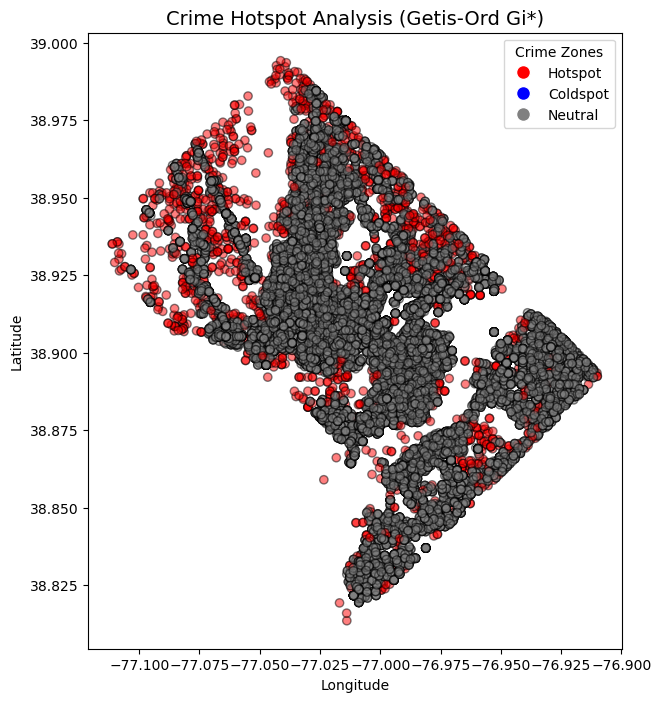

In [11]:
import matplotlib.pyplot as plt

# Plot hotspots
fig, ax = plt.subplots(figsize=(8, 8))
colors = {"Hotspot": "red", "Coldspot": "blue", "Neutral": "gray"}
gdf.plot(ax=ax, color=gdf["HOTSPOT_LABEL"].map(colors), alpha=0.5, edgecolor="black")

# Add title and legend
plt.title("Crime Hotspot Analysis (Getis-Ord Gi*)", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Hotspot'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Coldspot'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Neutral')],
           title="Crime Zones")

# Show the plot
plt.show()


In [12]:
# Define output file path
hotspot_geojson_path = "C:/Users/abiod/Desktop/GIS file/crime_hotspots.geojson"

# Save as GeoJSON for ArcGIS Online
gdf.to_file(hotspot_geojson_path, driver="GeoJSON")

# Return file path for download
hotspot_geojson_path


'C:/Users/abiod/Desktop/GIS file/crime_hotspots.geojson'

In [14]:
from sklearn.cluster import KMeans
import numpy as np

# Recreate crime_coords array
crime_coords = np.array(list(zip(gdf["LONGITUDE"], gdf["LATITUDE"])))

# Define number of clusters
num_clusters = 5  

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
gdf["CLUSTER_LABEL"] = kmeans.fit_predict(crime_coords)

# Save clustered data as GeoJSON for ArcGIS Online
clustered_geojson_path = "C:/Users/abiod/Desktop/GIS file/crime_clusters.geojson"
gdf.to_file(clustered_geojson_path, driver="GeoJSON")

# Confirm clustering
gdf[["LATITUDE", "LONGITUDE", "CLUSTER_LABEL"]].head()


,LATITUDE,LONGITUDE,CLUSTER_LABEL
0,38.829204,-76.999532,2
1,38.914830,-77.024977,4
2,38.955682,-77.027955,0
3,38.911853,-77.007644,1
4,38.855203,-76.989731,2


In [17]:
# Use "OFFENSE" instead of "CRIME_TYPE"
gdf_clustered = gdf[["LATITUDE", "LONGITUDE", "CLUSTER_LABEL", "OFFENSE"]]



In [16]:
print(gdf.columns)  # Show all available columns


Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID', 'geometry', 'HOTSPOT_SCORE',
       'HOTSPOT_LABEL', 'CLUSTER_LABEL'],
      dtype='object')
